Copyright (c) 2025 Quan-feng WU <wuquanfeng@ihep.ac.cn>

This notebook is released under the [MIT License](https://opensource.org/licenses/MIT).

# Preliminaries

In [1]:
using CairoMakie
using DelimitedFiles
using Format
using LaTeXStrings
using SpecialFunctions
using Statistics

using NaturalUnits

In [2]:
set_theme!(theme_latexfonts())

In [3]:
include("tool_script-directories.jl");
include("tool_script-BlackHawk_extension.jl");
include("tool_script-geomspace.jl");
include("tool_script-parameters.jl");

In [4]:
prepare_BlackHawk()


BlackHawk v2.3 - A. Arbey & J. Auffinger 2024

make  -C src/ libblackhawk.a
make[1]: Entering directory '/path/to/Primordial-Black-Hole/arXiv-2509.05618/external_code/BlackHawk_v2.3/src'
gcc -c -O3 -pipe -fomit-frame-pointer  evolution.c


make: Circular BlackHawk_inst.c <- BlackHawk_inst.c dependency dropped.


ar rcs libblackhawk.a evolution.o; rm evolution.o
gcc -c -O3 -pipe -fomit-frame-pointer  general.c
ar rcs libblackhawk.a general.o; rm general.o
gcc -c -O3 -pipe -fomit-frame-pointer  primary.c
ar rcs libblackhawk.a primary.o; rm primary.o
gcc -c -O3 -pipe -fomit-frame-pointer  secondary.c
ar rcs libblackhawk.a secondary.o; rm secondary.o
gcc -c -O3 -pipe -fomit-frame-pointer  spectrum.c
ar rcs libblackhawk.a spectrum.o; rm spectrum.o
gcc -c -O3 -pipe -fomit-frame-pointer  technical.c
ar rcs libblackhawk.a technical.o; rm technical.o
gcc -c -O3 -pipe -fomit-frame-pointer  hadro_pythia.c
ar rcs libblackhawk.a hadro_pythia.o; rm hadro_pythia.o
gcc -c -O3 -pipe -fomit-frame-pointer  hadro_herwig.c
ar rcs libblackhawk.a hadro_herwig.o; rm hadro_herwig.o
gcc -c -O3 -pipe -fomit-frame-pointer  hadro_pythianew.c
ar rcs libblackhawk.a hadro_pythianew.o; rm hadro_pythianew.o
gcc -c -O3 -pipe -fomit-frame-pointer  hadro_hazma.c
ar rcs libblackhawk.a hadro_hazma.o; rm hadro_hazma.o
gcc -c -O3 -pi

make: Circular BlackHawk_tot.c <- BlackHawk_tot.c dependency dropped.


gcc -o BlackHawk_tot.x -O3 -pipe -fomit-frame-pointer  -I./src -L./src BlackHawk_tot.o -lblackhawk -lm;


┌ Info: BlackHawk directory initialized successfully.
└ @ Main /path/to/Primordial-Black-Hole/arXiv-2509.05618/tool_script-BlackHawk_extension.jl:315


In [5]:
γ_PBH = .2

N_BH(T_BH) = (27 / 4) * N_ρ(T_BH) / (30720 * π)
T_BH(m_BH) = NU.M_Pl^2 / m_BH
t_PBH_formation(m_PBH) = m_PBH / (γ_PBH * NU.m_Pl^2)

@info "Utility functions for black hole loaded."

┌ Info: Utility functions for black hole loaded.
└ @ Main /path/to/Primordial-Black-Hole/arXiv-2509.05618/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sdnNjb2RlLXJlbW90ZQ==.jl:7


# Benchmark

In [6]:
m_PBH = 5e9 * NU.g
t_PBH_f = t_PBH_formation(m_PBH)

params = BlackHawkParameters()
BlackHawk_result_directory = tempname(BlackHawk_results_directory)
set_BlackHawk_name!(params, basename(BlackHawk_result_directory))
set_BlackHawk_mass!(params, m_PBH; NU=NU)
set_BlackHawk_energy_spectrum!(params, GeV(5), GeV(1e5), 100)
close_BlackHawk_dark_matter!(params)
set_BlackHawk_BBN!(params)

run_BlackHawk_inst(params)

inst_primary_spectra, inst_secondary_spectra = read_BlackHawk_instantaneous_spectra(BlackHawk_result_directory)

@info "Benchmark for m_PBH = $(m_PBH / NU.g) g"

┌ Info: Benchmark for m_PBH = 5.0e9 g
└ @ Main /path/to/Primordial-Black-Hole/arXiv-2509.05618/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X11sdnNjb2RlLXJlbW90ZQ==.jl:16


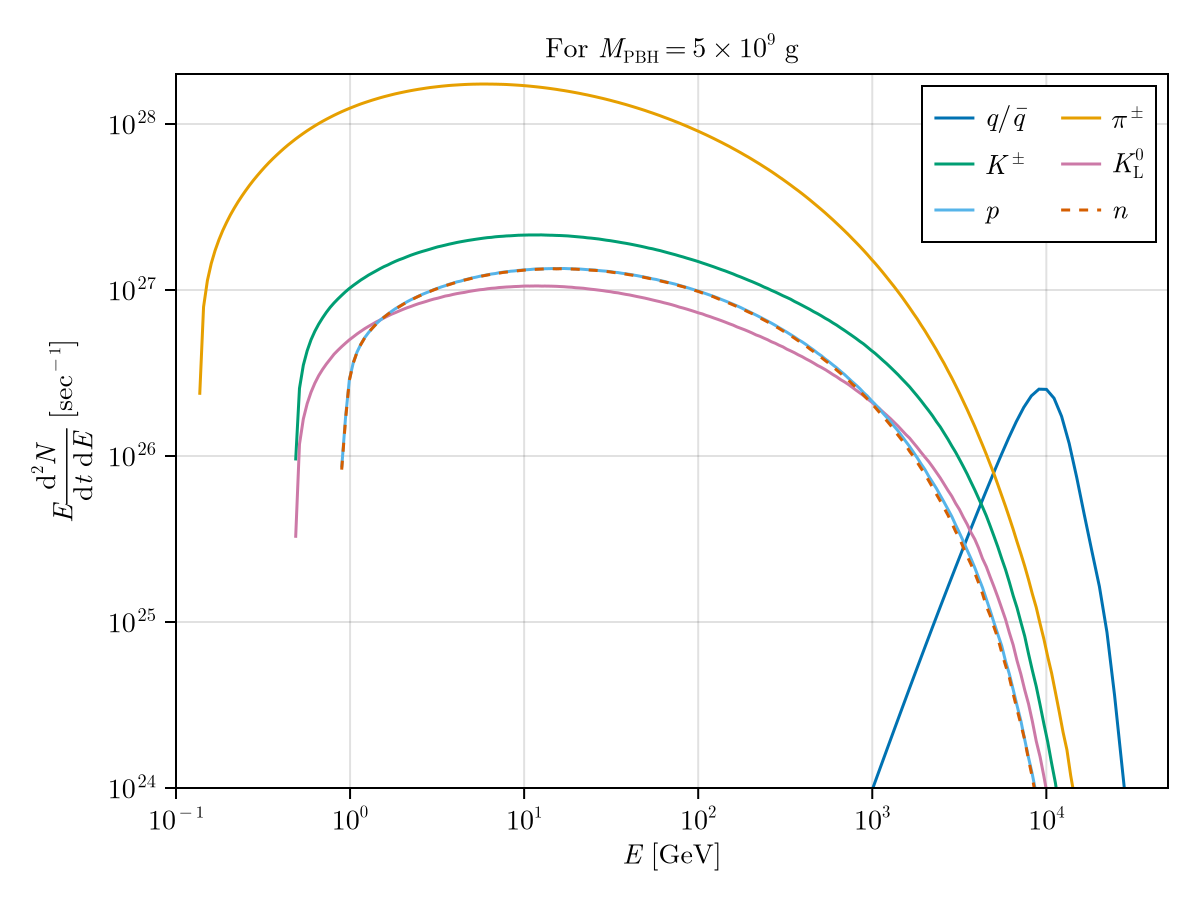

In [7]:
fig = Figure()
ax_spectra = Axis(fig[1, 1];
    title=L"For $M_\mathrm{PBH} = 5 \times 10^9 ~ \mathrm{g}$",
    xlabel=L"E \text{ [GeV]}",
    ylabel=L"E \frac{\mathrm{d}^2 N}{\mathrm{d}t ~ \mathrm{d}E} ~ \left[\mathrm{sec}^{-1}\right]",
    xscale=log10, yscale=log10,
    limits=((1e-1, 5e4), (1e24, 2e28)),
    xticks=(exp10.(-1:5), [L"10^{%$ii}" for ii in -1:5]),
)
lines!(ax_spectra, inst_primary_spectra["energy"], inst_primary_spectra["energy"] .* inst_primary_spectra["up"]; label=L"q / \bar{q}")
lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["pipm"]; label=L"\pi^\pm")
lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["Kpm"]; label=L"K^\pm")
lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["K0L"]; label=L"K^0_\mathrm{L}")
lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["proton"]; label=L"p")
lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["neutron"]; label=L"n", linestyle=:dash)
axislegend(ax_spectra; position=:rt, nbanks=2)

# save("plots/BlackHawk_instantaneous_spectra_for_M5e9gram.pdf", fig)
fig

# Spectra

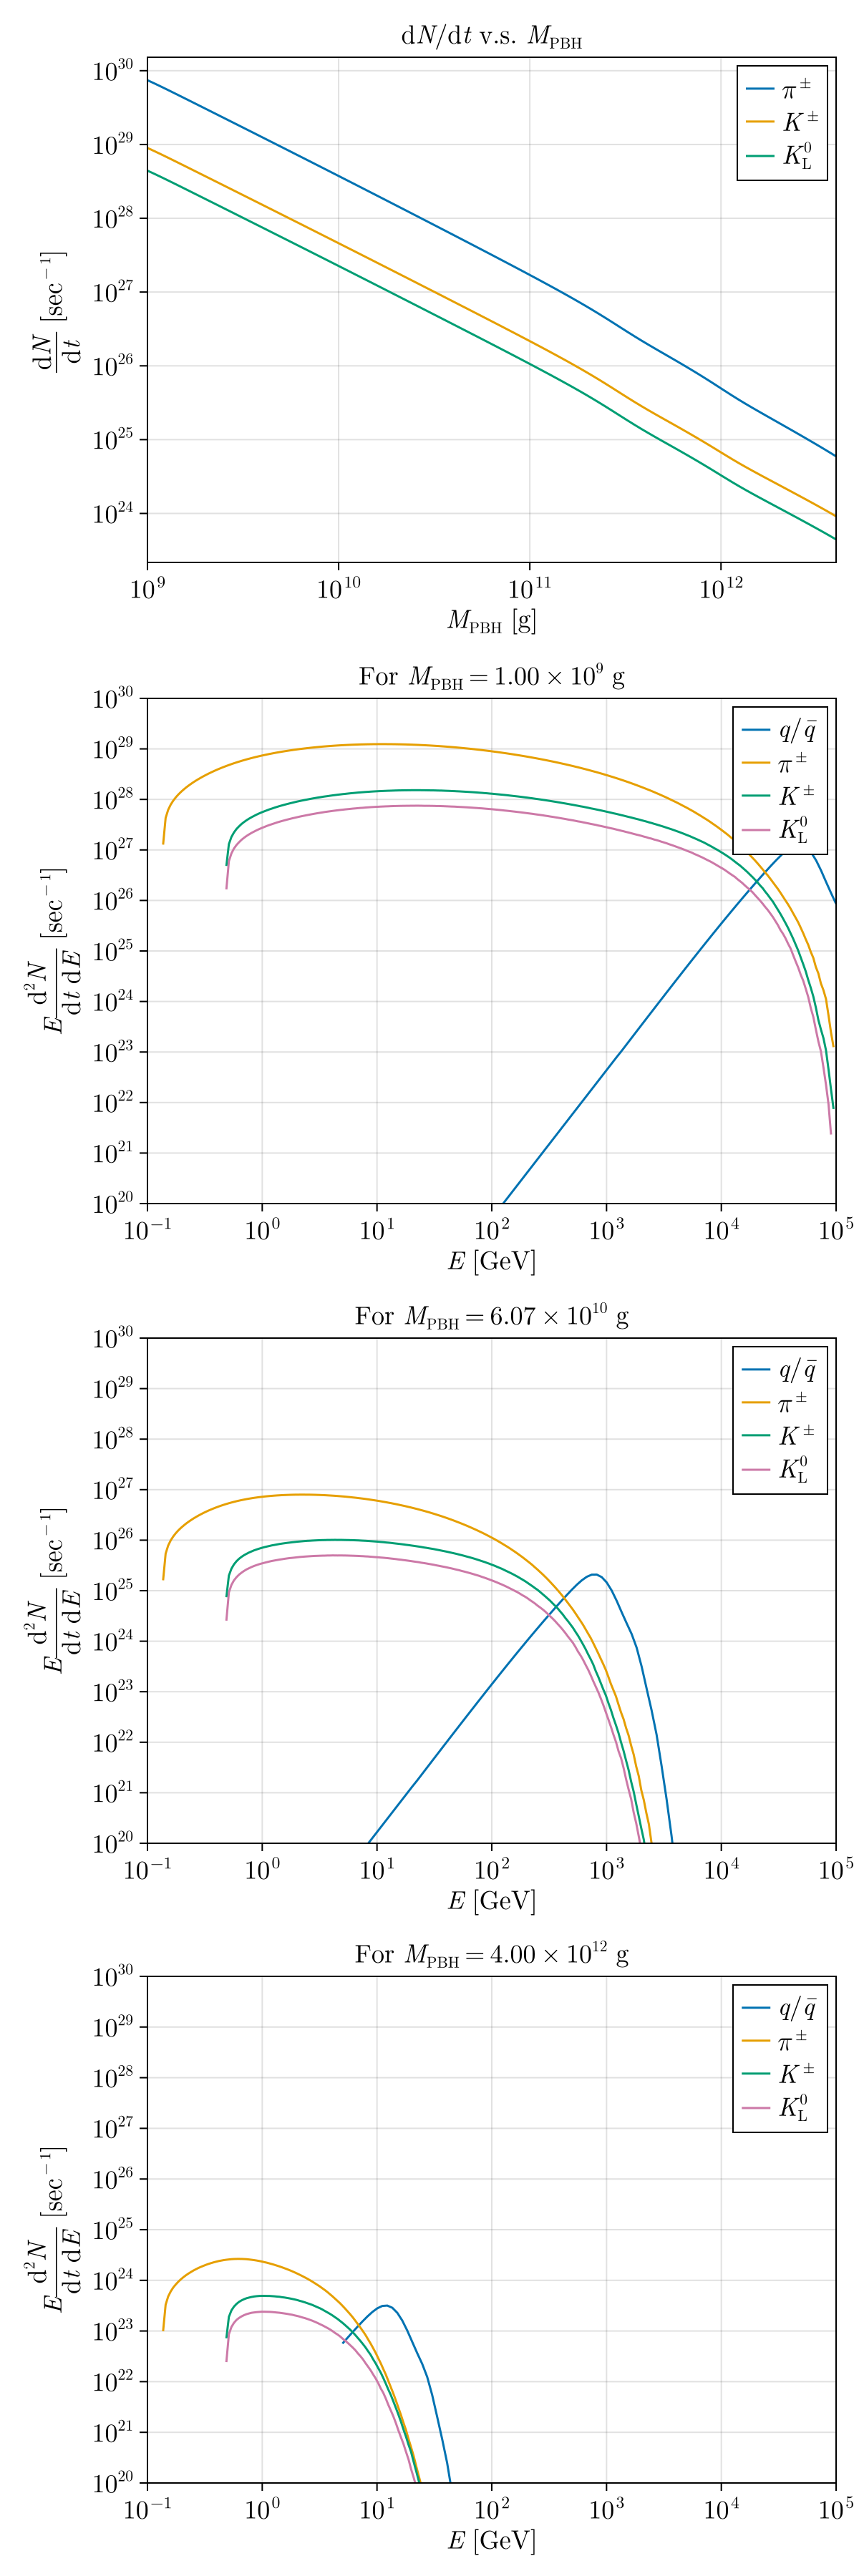

In [8]:
m_PBH_list = geomspace(1e9, 4e12, 100) .* NU.g
charged_pion_dN_over_dt_list = zeros(Float64, length(m_PBH_list))
charged_kaon_dN_over_dt_list = zeros(Float64, length(m_PBH_list))
kaon_zero_long_dN_over_dt_list = zeros(Float64, length(m_PBH_list))

# plot_indices = []
plot_indices = [1, 50, 100]
ii_plot = 1
fig = Figure(size=(600, 450 * (length(plot_indices) + 1)), fontsize=18)
for (ii, m_PBH) ∈ enumerate(m_PBH_list)
    params = BlackHawkParameters()
    BlackHawk_result_directory = tempname(BlackHawk_results_directory)
    set_BlackHawk_name!(params, basename(BlackHawk_result_directory))
    set_BlackHawk_mass!(params, m_PBH; NU=NU)
    set_BlackHawk_energy_spectrum!(params, GeV(5), GeV(1e5), 100)
    close_BlackHawk_dark_matter!(params)
    set_BlackHawk_BBN!(params)

    run_BlackHawk_inst(params)

    inst_primary_spectra, inst_secondary_spectra = read_BlackHawk_instantaneous_spectra(BlackHawk_result_directory)


    integrand_list = inst_secondary_spectra["energy"] .* inst_secondary_spectra["pipm"]
    h = mean(
        log.(inst_secondary_spectra["energy"][begin+1:end]) .-
        log.(inst_secondary_spectra["energy"][begin:end-1])
    )
    charged_pion_dN_over_dt_list[ii] = (h / 2) * (
        2 * sum(integrand_list) - (first(integrand_list) + last(integrand_list))
    )
    charged_kaon_dN_over_dt_list[ii] = (h / 2) * (
        2 * sum(inst_secondary_spectra["energy"] .* inst_secondary_spectra["Kpm"]) - 
        (first(inst_secondary_spectra["energy"] .* inst_secondary_spectra["Kpm"]) + last(inst_secondary_spectra["energy"] .* inst_secondary_spectra["Kpm"]))
    )
    kaon_zero_long_dN_over_dt_list[ii] = (h / 2) * (
        2 * sum(inst_secondary_spectra["energy"] .* inst_secondary_spectra["K0L"]) - 
        (first(inst_secondary_spectra["energy"] .* inst_secondary_spectra["K0L"]) + last(inst_secondary_spectra["energy"] .* inst_secondary_spectra["K0L"]))
    )

    if ii ∈ plot_indices
        m_in_gram = m_PBH / NU.g
        exponent_10 = (Int ∘ floor ∘ log10)(m_in_gram)
        coeff_10 = m_in_gram / 10^exponent_10
        m_str = "$(cfmt("%.2f", coeff_10)) \\times 10^{$(exponent_10)} ~ \\mathrm{g}"
        ax_spectra = Axis(fig[ii_plot+1, 1];
            title=L"For $M_\mathrm{PBH} = %$m_str$",
            xlabel=L"E \text{ [GeV]}",
            ylabel=L"E \frac{\mathrm{d}^2 N}{\mathrm{d}t ~ \mathrm{d}E} ~ \left[\mathrm{sec}^{-1}\right]",
            yticks=(exp10.(20:30), [L"10^{%$ii}" for ii ∈ 20:30]),
            xscale=log10, yscale=log10,
            limits=((1e-1, 1e5), (1e20, 1e30))
        )
        lines!(ax_spectra, inst_primary_spectra["energy"], inst_primary_spectra["energy"] .* inst_primary_spectra["up"]; label=L"q / \bar{q}")
        lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["pipm"]; label=L"\pi^\pm")
        lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["Kpm"]; label=L"K^\pm")
        lines!(ax_spectra, inst_secondary_spectra["energy"], inst_secondary_spectra["energy"] .* inst_secondary_spectra["K0L"]; label=L"K^0_\mathrm{L}")
        axislegend(ax_spectra, position=:rt)

        ii_plot += 1
    end
end

ax_n = Axis(fig[1, 1];
    title=L"$\mathrm{d} N / \mathrm{d} t$ v.s. $M_\mathrm{PBH}$",
    xlabel=L"M_\mathrm{PBH} \text{ [g]}",
    ylabel=L"\frac{\mathrm{d} N}{\mathrm{d} t} ~ \left[\mathrm{sec}^{-1}\right]",
    xscale=log10, yscale=log10,
    yticks=(exp10.(10:35), [L"10^{%$ii}" for ii ∈ 10:35]),
    limits=((1e9, 4e12), nothing)
)
lines!(ax_n, m_PBH_list ./ NU.g, charged_pion_dN_over_dt_list; label=L"\pi^\pm")
lines!(ax_n, m_PBH_list ./ NU.g, charged_kaon_dN_over_dt_list; label=L"K^\pm")
lines!(ax_n, m_PBH_list ./ NU.g, kaon_zero_long_dN_over_dt_list; label=L"K^0_\mathrm{L}")
axislegend(ax_n; position=:rt)

# save("plots/dNdt_vs_M_PBH.pdf", fig)
fig

In [9]:
open(joinpath(output_data_directory, "mesons_from_PBH.dat"), "w+") do io
    write(io, "m_PBH [GeV]\tcharged_pion_dN_over_dt [GeV]\tcharged_kaon_dN_over_dt [GeV]\tkaon_zero_long_dN_over_dt [GeV]\n")
    writedlm(io,
        hcat(EUval.(GeV, m_PBH_list),
            EUval.(GeV, charged_pion_dN_over_dt_list ./ NU.s),
            EUval.(GeV, charged_kaon_dN_over_dt_list ./ NU.s),
            EUval.(GeV, kaon_zero_long_dN_over_dt_list ./ NU.s)
        )
    )
end